# How to read and write from files

## Introduction
Once data sets get larger than 10-15 values experimental data is often stored in separate containers. These containers can be wildly different but the most portable are plain text delimited value files more commonly seen as <abbr title="Comma Separated Values">csv</abbr>.  This is a common exchange format from spreadsheets, data acquisition programs, and other analysis tools like jupyter. While there is a wide variation on how they might be strucuted, it is the robust because you can open an look at the contents with a simple text editor. They are so common the libraries we work with have easy routines to read and bring the data contained in the files into our system.  As it was with images, however, getting access can be tricky.

As with other HOWTO guides this document is meant to be interactive. Make a copy of it and try the things presented here and let it become your own reference.

## Structure of *csv* files

The organization of a csv file is fairly simple but can vary depending on the program that generated it.

If the file was exported from [***Tracker***](https://www.compadre.org/osp/items/detail.cfm?ID=7365), for example, it could be organized with the first line being the title of the data set, the second line being the labels for each column with the third line being the start of the numerical data.

Other programs might only use the first line to list the column labels but export all the data for multiple runs leaving you to sort out which column is important to import.  This is true of many of the commercial data acquisition programs.  

The good news is that once you have sorted these details out for one file it will work with all the files that come from the same source so you can repeat the import process by simply changing the name of the file you want to import.

## Getting the file path

Any file you want to read into your notebook is identified not by just its name but the directory path that leads to it.  As it was with images this gets tricky when dealling with files stored on gDrive.  

### Running jupyter locally on your machine

Here the 'kernel' is running on a local installation of jupyter.  Typing into a code cell the command:
`! ls` or `! dir` will list your default directory which, in most cases, will be the same folder as the jupyter file you are running.  In this case you can simply refer to the file by its name alone.

If the file is one of many in a subdirectory then precede the filename with the name of the subdirectory.  

### Running jupyter in CoLab

Because you are running on a 'virtual machine' the connection to the outside world changes a bit. The local environment has its own file system with a few files.  You can look at it by typing `! ls` in a code cell but there aren't many files there. So you have choices as to how you want to make files available.
  1. Upload the files to your virtual machine.
- $\color{green}+$ easy to do 
- $\color{red}-$ has to be re-done every time you restart your virtual machine
  2. Connect directly to your google drive
- $\color{green}+$ easy to do, now. 
- $\color{green}+$ reconnects automatically once set up.
- $\color{orange}{+/-}$ file paths can be long and convoluted but there is an easy way to get it.
  3. Access data directly from a GoogleSheet
- $\color{red}+$ really tricky, requires some understanding of the details. 
- $\color{green}+$ nice way to organzie lots of data sets.
- Details are at the end but not for the faint of heart



#### Upload files to virtual machine

Click on the folder icon on the left edge to see a listing of your local directory. 

<br/><br/>
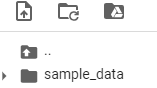

If you haven't started a kernel it will start one and you should see a simple listing.  Tapping on the "upload" icon image.png will get you a dialog to upload your files.


Tap the "update" button image.png to refresh the list, right click the file whose path you want to obtain and choose `copy path`.
You now have the information you need for the next step.

#### Connecting to gDrive

This is remarkably easy now so why not store your files this way?  

Click on the folder icon on the left edge to see a listing of your local directory. 

<br/><br/>
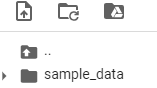

If you haven't started a kernel it will start one and you should see a simple listing. Click on the Drive icon image.png and if this is your first time then a code cell will open up giving you explicit instructions on how to give CoLab permission to access your drive account. Once you do this it will make this connection automatically the next time you start a virtual machine and you can access files in your Drive as if it were a normal file system.
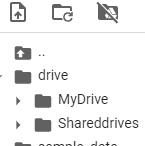
You will know when it is active by the addition of an new icon with the label `drive`.

Click on the folder to open and navigate to your text file.  Right click and choose `copy path`. You are ready for the next step.

## `np.loadtxt()` Reading in data.

You have a path and now it is time to read values from the csv file.
If you pasted the copied `path` to a code cell it might look something like..
 - `dataFiles\run01.csv  # for a local file`
 - `run01.csv            # for a file uploaded to a virtual machine`
 - `/content/drive/MyDrive/Colab Notebooks/dataset.csv # for a Drive file`

we will call these tags `fpath` in the next step.

Because delimited text files like csv have quite a variation in their styles we need to know a little about how this tool works so we know how to set it up.  We also need to know a little about the text file itself so we can import it properly.  But before any of this happens we need to find the file.

  1. Display the first 10 lines:
      In a code cell type: `!head "`*`fpath`*`"` to display the first 10 lines. (The quotes are needed in case the path has spaces.)
  2. Some data sets may start with a list of numbers while others may start with a title and column labels. Note the structure and in particular note how many lines you need to skip before getting to the 'good stuff'
  3. Set up a new code cell and try running the the numpy method `loadtext()` and see if it works.

#### Example
`! head "/content/drive/MyDrive/Colab Notebooks/Raw Data/FilterC_01Clip.csv"`

Should yield the following:
```
FilterC
t,x
0.000000000E0,2.976746146E-1
3.336670003E-2,1.659507829E-1
6.673340007E-2,1.759977847E-1
1.001001001E-1,2.189569528E-1
1.334668001E-1,2.689880239E-1
1.668335002E-1,3.287896771E-1
2.002002002E-1,3.880837200E-1
2.335669002E-1,4.471503321E-1
```

##### Just the data, maam

What this shows...
 - 1st line looks like a title
 - 2nd are column labels
 - data starts on the 3rd line


```python
import numpy as np

fPath = "/content/drive/MyDrive/Colab Notebooks/Raw Data/FilterC_01Clip.csv"
values = np.loadtxt(
    fPath,         #path name
    delimiter=",", # specify delimiter, a comma here
    skiprows=2,    # skip the first two rows
    usecols=(0,1), # will pull in only these columns (first column is 0, 2nd is 1, etc.) if left blank then all the data is pulled in
    )

# separate the columns into individual arrays (see the more advanced example for an alternate method)
[tvals, xvals] = values.T

print(f"data: {values[:8]}")
```
Produces the following output
```
  [[0.       , 0.29767461],
  [0.0333667 , 0.16595078],
  [0.0667334 , 0.17599778],
  [0.1001001 , 0.21895695],
  [0.1334668 , 0.26898802],
  ...
```
which matches the output seen in the `head` command

##### Data and headers

You can, optionally, repeat this step to capture the annotations in the file:
```python
# we can go on to capture the title
title = np.loadtxt(
    fPath, #path name
    delimiter="!", # specify delimiter _not_ in the string so we get the whole line
    dtype="str",     # tell the converter to leave the input unchanged
    skiprows=0,      # NOT STRICTLY NECESSARY but good for documentation
    max_rows=1,      # limit to only one line: the first (we didn't skip any)
    # usecols=(0,1), # NOT NEEDED we want everything on this line
    )
print(f"title: '{title}'")

# we can go on to capture the column headers
columns = np.loadtxt(
    fPath, #path name
    delimiter=",", # specify delimiter, a comma here
    dtype="str",   # tell the converter to leave the input unchanged
    skiprows=1,    # skip over the title
    max_rows=1,    # limit to only one line: the second (we skipped the first one)
    usecols=(0,1), # match our data columns
    )
print(f"col1 label: '{columns[0]}', col2 label: '{columns[1]}'")
```
These variations show how you can control exactly what parts of the csv file you pull in.

##### Everything in a code cell

In [ ]:
#@title Live example
import numpy as np
fPath = "-put your file path here-"

#@markdown  - Load the data
values = np.loadtxt(
    fPath, #path name
    delimiter=",", # specify delimiter, a comma here
    skiprows=2,    # skip the first two rows
    usecols=(0,1), # will pull in only these columns (first column is 0, 2nd is 1, etc.) if left blank then all the data is pulled in
    )
# separate the columns into individual arrays
[tvals, xvals] = values.T

print(f"data: {values[:8]}")

#@markdown  - [*opt*] Capture the title
# we can go on to capture the title
title = np.loadtxt(
    fPath, #path name
    delimiter="@",   # a character _not_ in the first line so we get the whole thing
    dtype="str",     # tell the converter to leave the input unchanged
    skiprows=0,      # NOT STRICTLY NECESSARY but good for documentation
    max_rows=1,      # limit to only one line: the first (we didn't skip any)
    # usecols=(0,1), # NOT NEEDED we want everything on this line
    )
print(f"title: '{title}'")

#@markdown  - [*opt*] Capture the column labels 
# we can go on to capture the column headers
columns = np.loadtxt(
    fPath, #path name
    delimiter=",", # specify delimiter, a comma here
    dtype="str",   # tell the converter to leave the input unchanged
    skiprows=1,    # skip over the title
    max_rows=1,    # limit to only one line: the second (we skipped the first one)
    usecols=(0,1), # match our data columns
    )
print(f"col1 label: '{columns[0]}', col2 label: '{columns[1]}'")
# Thats it.

#### A more advanced example

Here is an example with mulitple columns and data regions (source: IPhysics)

In [35]:
! head "/content/drive/MyDrive/Colab Notebooks/Physics/data/Collision.csv"

Collision Data
mass1:,0.5,I1:,1.0,r1,2.0
mass2:,0.5,I2:,0.25,r2,1.0
time,p1.pos.x,p1.pos.y,p1.th,p1.px,p1.py,p1.L,p2.pos.x,p2.pos.y,p2.th,p2.px,p2.py,p2.L,F.x,F.y,tq1,tq2
0.0,-14.9,-1.0,0.0,1.0,-9.48032079037932e-19,3.7921283161517284e-19,0.0,0.0,0.0,1.412567797766519e-17,9.48032079037932e-19,1.8960641580758642e-19,-2.825135595533038e-16,-1.896064158075864e-17,3.7921283161517284e-19,-1.8960641580758642e-19
0.05,-14.8,-1.0,1.8960641580758644e-20,1.0,-2.2354759901762766e-18,8.941903960705107e-19,1.4125677977665191e-18,9.480320790379321e-20,3.792128316151729e-20,3.317984786251269e-17,2.2354759901762766e-18,4.4709519803525535e-19,-3.8108339769694997e-16,-2.574887822276689e-17,5.149775644553378e-19,-2.574887822276689e-19
0.1,-14.700000000000001,-1.0,6.367016138428418e-20,1.0,-3.983909689497807e-18,1.5935638757991229e-18,4.730552584017788e-18,3.1835080692142086e-19,1.2734032276856836e-19,5.888182324253919e-17,3.983909689497807e-18,7.967819378995614e-19,-5.140395076005299e-16,-3.4968673986430

importing data from /content/drive/MyDrive/Colab Notebooks/Physics/data/Collision.csv


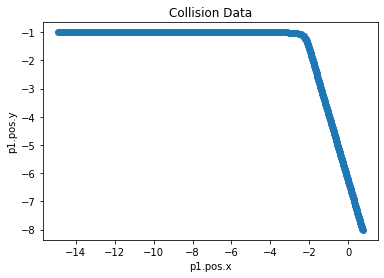

In [50]:
import numpy as np
import matplotlib.pyplot as plt

fPath = "/content/drive/MyDrive/Colab Notebooks/Physics/data/Collision.csv"

print(f"importing data from {fPath}")
time, posx, posy = np.loadtxt(  # an alternate way to pull individual columns if unpack is set to True
                            fPath,         #path name
                            delimiter=",", # specify delimiter, a comma here
                            skiprows=4,    # skip the first four rows
                            usecols=(0,1,2), # grab the time value (col0) and the x (col1) and y (col2) position values
                            unpack=True,   # allows us to skip the step where we have to separate the data
                            )
#[time, posx, posy] = values.T
plt.scatter(posx, posy)

timeLbl, posxLbl, posyLbl = np.loadtxt( # an alternate way to pull individual columns if unpack is set to True
                              fPath,         #path name
                              dtype="str",
                              delimiter=",", # specify delimiter, a comma here
                              skiprows=3,    # skip the first four rows
                              max_rows=1,
                              usecols=(0,1,2), # grab the time value (col0) and the x (col1) and y (col2) position values
                              unpack=True,
                              )
#[timeLbl, posxLbl, posyLbl] = labels.T
plt.xlabel(posxLbl)
plt.ylabel(posyLbl)

header = np.loadtxt(
    fPath,         #path name
    dtype="str",
    delimiter="!",  # character not in the title string
    max_rows=1,
    )
plt.title(header)
# location data

plt.show()